In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [2]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
# Or for an Excel file: url = "https://example.com/path/to/dataset.xlsx"

# Read the dataset
df = pd.read_csv(url)
# For Excel: df = pd.read_excel(url)


df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df =df.reset_index()
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:

df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


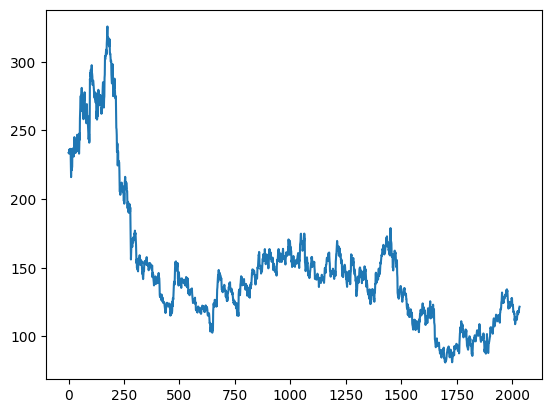

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2030    121.0780
2031    121.1060
2032    121.1715
2033    121.2525
2034    121.3585
Name: Close, Length: 2035, dtype: float64

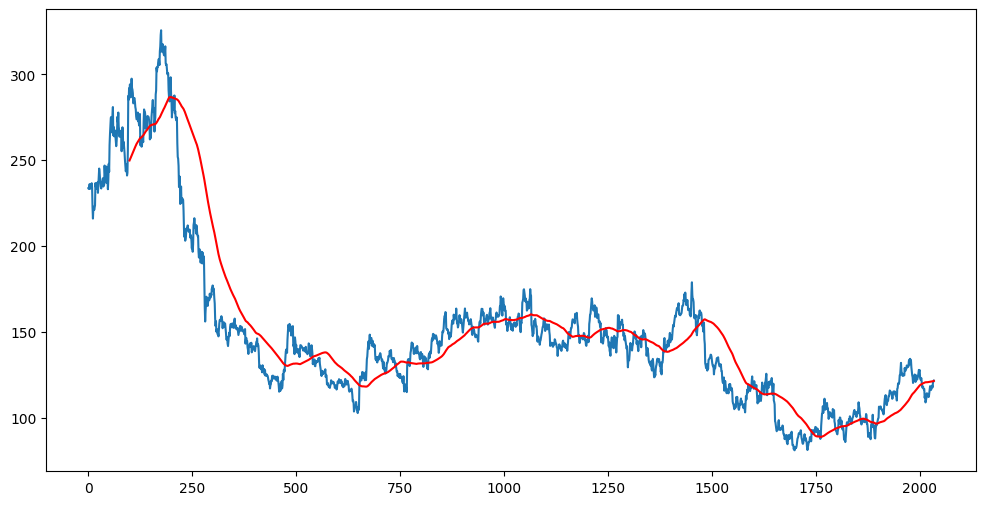

In [8]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2030    111.00550
2031    111.10375
2032    111.20325
2033    111.30875
2034    111.42800
Name: Close, Length: 2035, dtype: float64

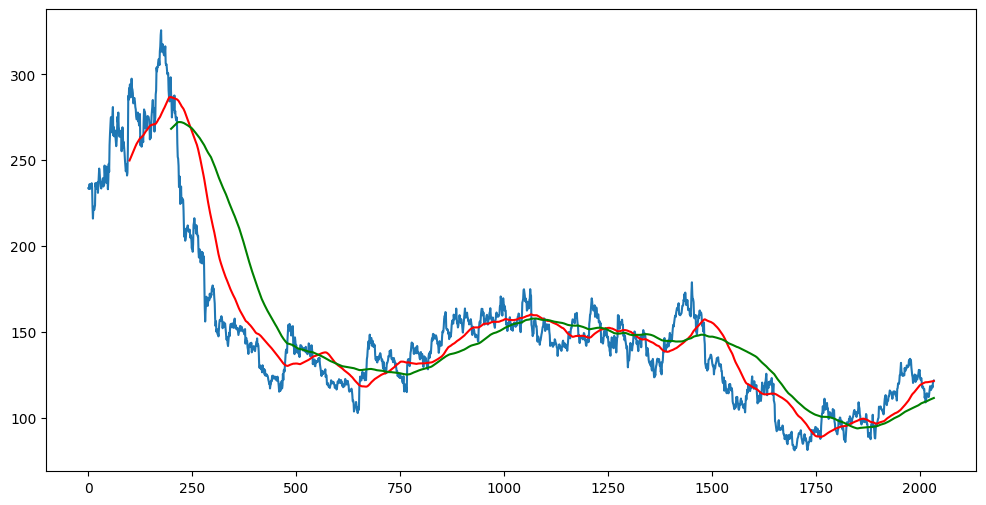

In [10]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1424, 1)
(611, 1)


In [12]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.58762887],
       [0.58538772],
       [0.58987001],
       ...,
       [0.26064545],
       [0.2568355 ],
       [0.25907665]])

In [14]:
x_train=[]
y_train = []
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [15]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [16]:
from keras.engine import sequential
model = Sequential()
model.add(LSTM(units = 50 ,activation = 'relu', return_sequences = True,input_shape =(x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 ,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [18]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs =100)

Epoch 1/100
42/42 [==============================] - 18s 217ms/step - loss: 0.0246
Epoch 2/100
42/42 [==============================] - 9s 218ms/step - loss: 0.0072
Epoch 3/100
42/42 [==============================] - 10s 236ms/step - loss: 0.0068
Epoch 4/100
42/42 [==============================] - 10s 234ms/step - loss: 0.0062
Epoch 5/100
42/42 [==============================] - 9s 222ms/step - loss: 0.0059
Epoch 6/100
42/42 [==============================] - 10s 226ms/step - loss: 0.0048
Epoch 7/100
42/42 [==============================] - 10s 227ms/step - loss: 0.0047
Epoch 8/100
42/42 [==============================] - 9s 225ms/step - loss: 0.0045
Epoch 9/100
42/42 [==============================] - 10s 228ms/step - loss: 0.0053
Epoch 10/100
42/42 [==============================] - 9s 219ms/step - loss: 0.0049
Epoch 11/100
42/42 [==============================] - 10s 228ms/step - loss: 0.0052
Epoch 12/100
42/42 [==============================] - 10s 226ms/step - loss: 0.0039
Epoch

In [19]:
model.save('keras_model.h5')

In [20]:
past_100_days = data_training.tail(100)

In [21]:
final_df =past_100_days.append(data_testing,ignore_index = True)

C:\Users\mauli\AppData\Local\Temp\ipykernel_16640\547952303.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df =past_100_days.append(data_testing,ignore_index = True)


In [23]:
final_df.head()

,Close
0,142.65
1,144.40
2,144.05
3,146.60
4,143.25


In [24]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.63023493],
       [0.64811032],
       [0.64453524],
       [0.67058223],
       [0.63636364],
       [0.67773238],
       [0.613381  ],
       [0.66905005],
       [0.68181818],
       [0.6659857 ],
       [0.68539326],
       [0.71552605],
       [0.69560776],
       [0.68028601],
       [0.67824311],
       [0.69509704],
       [0.67722165],
       [0.64657814],
       [0.6072523 ],
       [0.5628192 ],
       [0.58631256],
       [0.60878447],
       [0.59039837],
       [0.57354443],
       [0.53830439],
       [0.52451481],
       [0.51889683],
       [0.51532176],
       [0.51123596],
       [0.50255363],
       [0.52962206],
       [0.48263534],
       [0.47446374],
       [0.50766088],
       [0.54392237],
       [0.51583248],
       [0.47906027],
       [0.43462717],
       [0.4351379 ],
       [0.45914198],
       [0.44586313],
       [0.48416752],
       [0.50255363],
       [0.51225741],
       [0.53575077],
       [0.54545455],
       [0.53677222],
       [0.533

In [25]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
  

In [26]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(611, 100, 1)
(611,)


In [27]:
y_predicted = model.predict(x_test)


20/20 [==============================] - 3s 77ms/step


In [28]:
y_predicted.shape

(611, 1)

In [29]:
scaler.scale_

array([0.0102145])

In [30]:
scaler_factor = 1/0.00717991
y_predicted = y_predicted*scaler_factor
y_test = y_test*scaler_factor

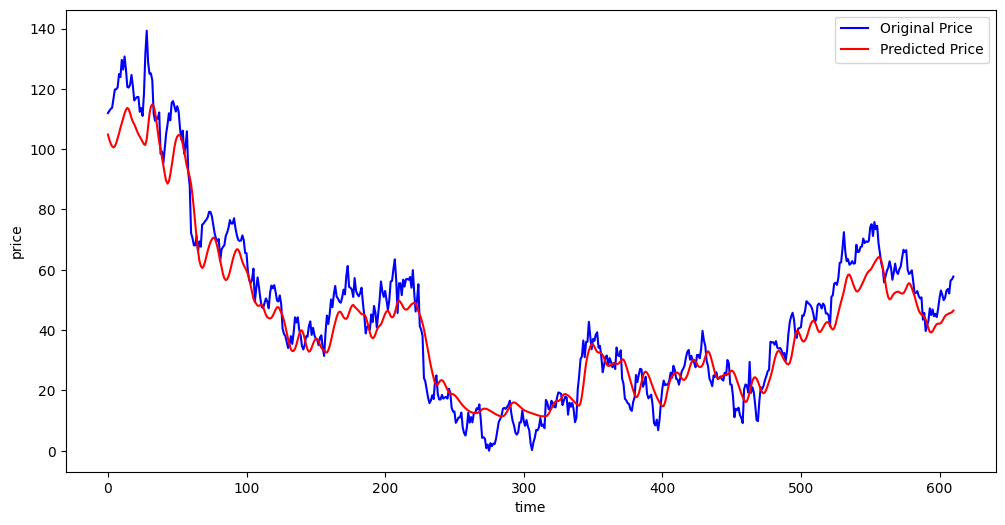

In [31]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()